## Kruskal-Wallis with Posthoc Dunn + statannotations

In this notebook you can see how to implement a Kruskal-Wallis test with Posthoc Dunn and visualize the results using seaborn and statannotations. We'll also check how this is different than the Kruskal-Wallis test included in statannotations.

In [1]:
%load_ext nb_black
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

iris_obj = load_iris()
iris_df = pd.DataFrame(iris_obj.data, columns=iris_obj.feature_names)

iris_df["species"] = [iris_obj.target_names[s] for s in iris_obj.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<IPython.core.display.Javascript object>

In [2]:
species = np.unique(iris_df.species)

data = []

for s in species:
    data.append(iris_df[iris_df.species == s]["sepal length (cm)"])

<IPython.core.display.Javascript object>

In [3]:
from scipy import stats

stats.kruskal(*data)

KruskalResult(statistic=96.93743600064833, pvalue=8.91873433246198e-22)

<IPython.core.display.Javascript object>

In [4]:
from scikit_posthocs import posthoc_dunn

# posthoc dunn test, with correction for multiple testing
dunn_df = posthoc_dunn(iris_df, val_col='sepal length (cm)', group_col='species', p_adjust='fdr_bh')
dunn_df

,setosa,versicolor,virginica
setosa,1.000000e+00,1.529257e-09,6.000296e-22
versicolor,1.529257e-09,1.000000e+00,2.774866e-04
virginica,6.000296e-22,2.774866e-04,1.000000e+00


<IPython.core.display.Javascript object>

In [5]:
keep = np.tril(np.ones(dunn_df.shape), k=0).astype('bool')
dunn_df[keep] = np.nan

molten_df = dunn_df.melt(ignore_index = False).reset_index().dropna()
molten_df

,index,variable,value
3,setosa,versicolor,1.529257e-09
6,setosa,virginica,6.000296e-22
7,versicolor,virginica,2.774866e-04


<IPython.core.display.Javascript object>

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

setosa vs. versicolor: Custom statistical test, P_val:1.529e-09
versicolor vs. virginica: Custom statistical test, P_val:2.775e-04
setosa vs. virginica: Custom statistical test, P_val:6.000e-22


(<AxesSubplot:xlabel='species', ylabel='sepal length (cm)'>,
  <statannotations.Annotation.Annotation at 0x23e8732a100>])

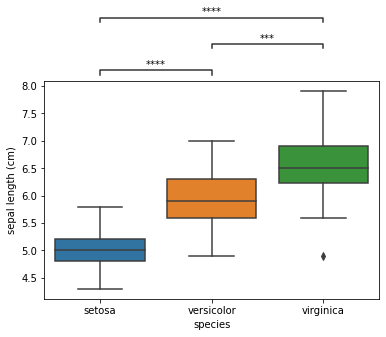

<IPython.core.display.Javascript object>

In [7]:
from statannotations.Annotator import Annotator

ax = sns.boxplot(data=iris_df, x='species', y='sepal length (cm)', order=species)

pairs = [(i[1]['index'], i[1]['variable']) for i in molten_df.iterrows()]
p_values = [i[1]['value'] for i in molten_df.iterrows()]

annotator = Annotator(ax, pairs, data=iris_df, x='species', y='sepal length (cm)', order=species)
annotator.configure(text_format='star', loc='outside')
annotator.set_pvalues_and_annotate(p_values)

## Comparison with Kruskal Wallis implementation in statannotations

statannotations includes the Kruskal Wallis H test as well, but it is applied on all groups pairwise (note it is not a test for paired samples). Then it applies the selected correction on the p-values. Note that this is not usually how this statistic is applied.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

setosa vs. versicolor: Kruskal-Wallis paired samples with Benjamini-Hochberg correction, P_val:8.130e-14 Stat=5.577e+01
versicolor vs. virginica: Kruskal-Wallis paired samples with Benjamini-Hochberg correction, P_val:5.765e-07 Stat=2.499e+01
setosa vs. virginica: Kruskal-Wallis paired samples with Benjamini-Hochberg correction, P_val:6.212e-17 Stat=6.991e+01


(<AxesSubplot:xlabel='species', ylabel='sepal length (cm)'>,
  <statannotations.Annotation.Annotation at 0x23e894937c0>])

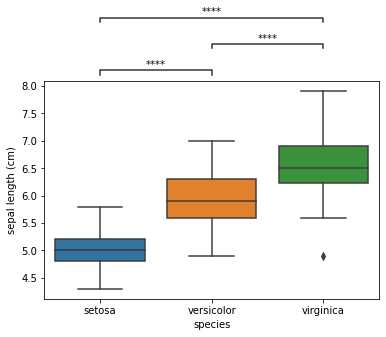

<IPython.core.display.Javascript object>

In [10]:
ax = sns.boxplot(data=iris_df, x='species', y='sepal length (cm)', order=species)

pairs = [(i[1]['index'], i[1]['variable']) for i in molten_df.iterrows()]

annotator = Annotator(ax, pairs, data=iris_df, x='species', y='sepal length (cm)', order=species)
annotator.configure(test='Kruskal', text_format='star', loc='outside', comparisons_correction='fdr_bh')
annotator.apply_and_annotate()